In [3]:
!pip install opencv-python-headless

In [4]:
import cv2
print(cv2.__version__)

4.11.0


In [5]:
import cv2
import numpy as np
import string
import os
import matplotlib.pyplot as plt

In [6]:
d = {chr(i):i for i in range(255)} #character to ascii
c = {i:chr(i) for i in range(255)} #ascii to characher

In [7]:
d

{'\x00': 0,
 '\x01': 1,
 '\x02': 2,
 '\x03': 3,
 '\x04': 4,
 '\x05': 5,
 '\x06': 6,
 '\x07': 7,
 '\x08': 8,
 '\t': 9,
 '\n': 10,
 '\x0b': 11,
 '\x0c': 12,
 '\r': 13,
 '\x0e': 14,
 '\x0f': 15,
 '\x10': 16,
 '\x11': 17,
 '\x12': 18,
 '\x13': 19,
 '\x14': 20,
 '\x15': 21,
 '\x16': 22,
 '\x17': 23,
 '\x18': 24,
 '\x19': 25,
 '\x1a': 26,
 '\x1b': 27,
 '\x1c': 28,
 '\x1d': 29,
 '\x1e': 30,
 '\x1f': 31,
 ' ': 32,
 '!': 33,
 '"': 34,
 '#': 35,
 '$': 36,
 '%': 37,
 '&': 38,
 "'": 39,
 '(': 40,
 ')': 41,
 '*': 42,
 '+': 43,
 ',': 44,
 '-': 45,
 '.': 46,
 '/': 47,
 '0': 48,
 '1': 49,
 '2': 50,
 '3': 51,
 '4': 52,
 '5': 53,
 '6': 54,
 '7': 55,
 '8': 56,
 '9': 57,
 ':': 58,
 ';': 59,
 '<': 60,
 '=': 61,
 '>': 62,
 '?': 63,
 '@': 64,
 'A': 65,
 'B': 66,
 'C': 67,
 'D': 68,
 'E': 69,
 'F': 70,
 'G': 71,
 'H': 72,
 'I': 73,
 'J': 74,
 'K': 75,
 'L': 76,
 'M': 77,
 'N': 78,
 'O': 79,
 'P': 80,
 'Q': 81,
 'R': 82,
 'S': 83,
 'T': 84,
 'U': 85,
 'V': 86,
 'W': 87,
 'X': 88,
 'Y': 89,
 'Z': 90,
 '[': 91,


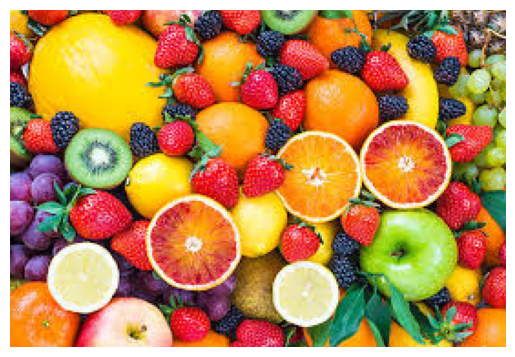

In [8]:
#load the image
image_path = "C:\\Users\\Public\\fruits.jpg"
x = cv2.imread(image_path)
xrgb = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.axis('off')
plt.show()

In [9]:
x.shape

(185, 272, 3)

In [10]:
key = "123"
text = "secret"
key

'123'

In [11]:
#ASCII VALUES
text_ascii = [d[ch] for ch in text]#list of ASCII values of text chars
key_ascii = [d[ch] for ch in key]#list of ASCII VALUES of key
print(text_ascii)
print(key_ascii)

[115, 101, 99, 114, 101, 116]
[49, 50, 51]


In [12]:
#Encrypt using pixel modelfication
x_enc = x.copy()
n = 0 #no.of rows
m = 0 #no.of columns
z = 0 #color panel
l = len(text)
kl = 0
for i in range(l):
    org_val = x_enc[n,m,z]
    new_val =d[text[i]]^d[key[kl]]
    x_enc[n,m,z] = new_val
    print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val} at pixel ({n}, {m}, {z}) [original = {org_val}]")
    n = n+1
    m = m+1
    z = (z+1) % 3
    m = (m+1) % 3
    kl = (kl+1) % len(key)

Embedding 's' (ASCII 115) XOR '1' (ASCII 49) = 66 at pixel (0, 0, 0) [original = 71]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (1, 2, 1) [original = 208]
Embedding 'c' (ASCII 99) XOR '3' (ASCII 51) = 80 at pixel (2, 1, 2) [original = 241]
Embedding 'r' (ASCII 114) XOR '1' (ASCII 49) = 67 at pixel (3, 0, 0) [original = 33]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (4, 2, 1) [original = 195]
Embedding 't' (ASCII 116) XOR '3' (ASCII 51) = 71 at pixel (5, 1, 2) [original = 252]


In [13]:
cv2.iwrite("fruits.jpg",x_enc)

AttributeError: module 'cv2' has no attribute 'iwrite'

In [ ]:
plt.imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))
plt.title("ENCRYPTED IMAGE")
plt.axis('off')
plt.show

In [ ]:
#DECRYPT
n,m,z = 0,0,0
kl = 0
decrypt = ""
for i in range(l):
    val = x_enc[n,m,z]
    orig_char = c[val^d[key[kl]]]
    decrypt = decrypt + orig_char
    print(f"Decrypting pixel ({n}, {m}, {z}): {val} XOR {d[key[kl]]} = {val^d[key[kl]]}")
    n = n+1
    m = m+1
    m = (m+1) % 3
    z = (z+1) % 3
    kl = (kl+1) % len(key)
print(decrypt)